# Cleaning the Dataset

Importing Pandas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

Reading the CSV file through Pandas

In [2]:
dataset = pd.read_csv(
    "F:\Data_Science\winequalityN.csv",
    header = 0       
)

Filling missing data with mean value of the given column and replacing strings in Type with integers

In [3]:
dataset.fillna(dataset.mean(),inplace = True)

In [4]:
dataset.replace(
    to_replace = ["red","white"],
    value = [1,2],
    inplace = True
)

Plotting pH vs Alcohol content

(0, 80)

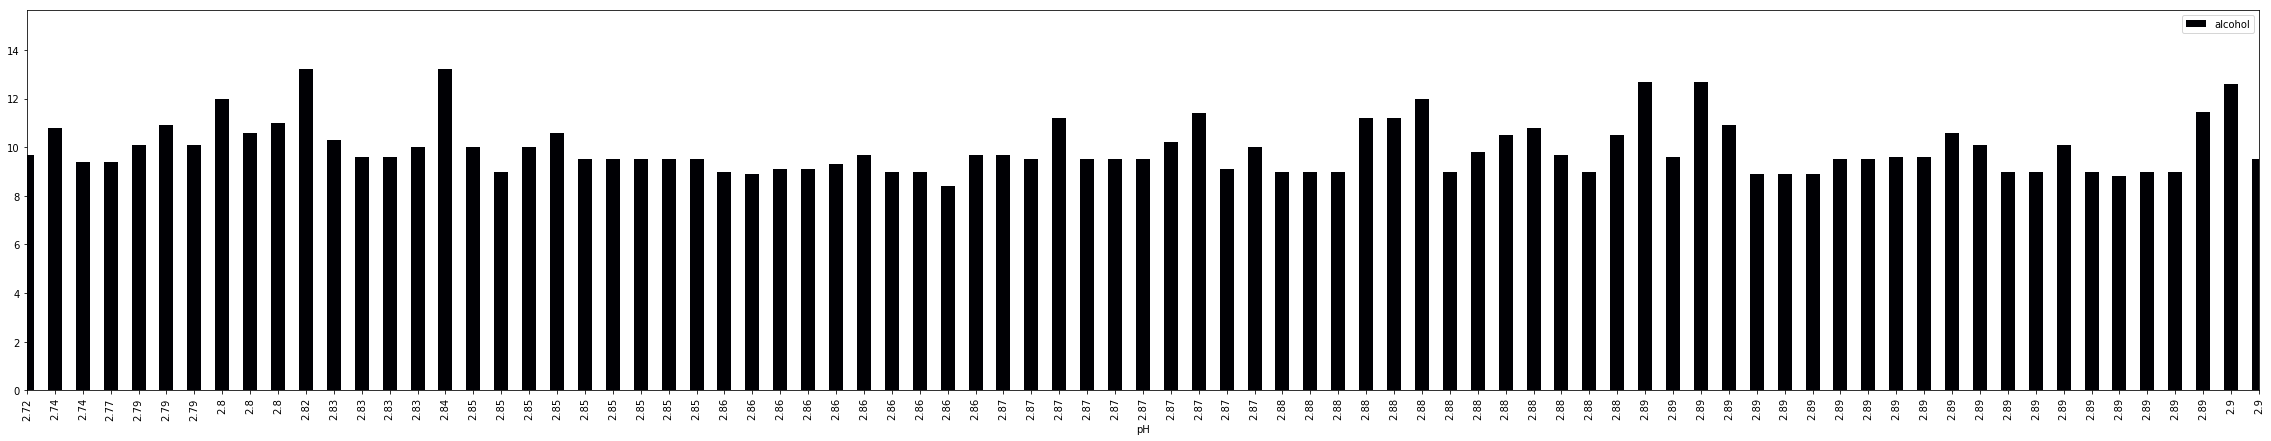

In [5]:
datasetSorted = dataset.sort_values('pH',inplace = False)

ax= datasetSorted.plot(
    x = 'pH',
    y = 'alcohol',
    kind = 'bar',
    figsize = (40,7),
    colormap = 'magma'
)

ax.set_xlim(0,80)

Normalizing Dataset for Model Usage

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dataset)
datasetEdit = pd.DataFrame(np_scaled)

C:\Users\hp\Anaconda3\envs\TensorFlowEnv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Building the ML Model

Importing necessary libraries

In [18]:
import tensorflow as tf
import numpy as np
import math

Bifurgating X and Y vectors

In [19]:
from keras.utils import to_categorical

In [44]:
X = datasetEdit.iloc[:,0:dataset.shape[1]-1]
Y = datasetEdit.iloc[:,dataset.shape[1]-1:dataset.shape[1]]

X_train = X.iloc[0:math.ceil(X.shape[0]*0.8),:]
X_train = X_train
Y_train = Y.iloc[0:math.ceil(Y.shape[0]*0.8),:]

Y_train = (Y_train)

X_test = X.iloc[math.ceil(X.shape[0]*0.8):X.shape[0],:]
X_test = X_test
Y_test = Y.iloc[math.ceil(Y.shape[0]*0.8):Y.shape[0],:]
Y_test = (Y_test)

#integers = Y_train.values
#encoded = to_categorical(integers,num_classes=11)
#Y_train = encoded[:,:,1:encoded.shape[2]]

#Y_train = Y_train.reshape(10,5198)

#integers = Y_test.values
#encoded = to_categorical(integers,num_classes=11)
#Y_test = encoded[:,:,1:encoded.shape[2]]

#Y_test = Y_test.reshape(10,1299)

In [45]:
print("Number of Training Examples: "+str(X_train.shape[1]))
print("Number of Features: "+str(X_train.shape[0]))
print("Shape of Input Training Vector X: "+str(X_train.shape))
print("Shape of Output Training Vector Y: "+str(Y_train.shape))

print("Number of Testing Examples: "+str(X_test.shape[0]))
print("Shape of Input Testing Vector X: "+str(X_test.shape))
print("Shape of Output Testing Vector Y: "+str(Y_test.shape))

Number of Training Examples: 12
Number of Features: 5198
Shape of Input Training Vector X: (5198, 12)
Shape of Output Training Vector Y: (5198, 1)
Number of Testing Examples: 1299
Shape of Input Testing Vector X: (1299, 12)
Shape of Output Testing Vector Y: (1299, 1)


Defining and Initializing Data

In [46]:
def create(n_x,n_y):
    X = tf.placeholder(tf.float32,[None,n_x],name='X')
    Y = tf.placeholder(tf.float32,[None,n_y],name='Y')
    
    return X,Y

Parameter Initialization

In [47]:
def parameters():
    
    #W1 = tf.get_variable("W1", [10, 12],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable("W1", [12, 6],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [1, 6],dtype=tf.float32, initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [6, 1],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [1, 1],dtype=tf.float32, initializer = tf.zeros_initializer())
    #W3 = tf.get_variable("W3", [10, 12],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    #b3 = tf.get_variable("b3", [10, 1],dtype=tf.float32, initializer = tf.zeros_initializer())
    #W4 = tf.get_variable("W4", [10, 12],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    #b4 = tf.get_variable("b4", [10, 1],dtype=tf.float32, initializer = tf.zeros_initializer())
    
    parSet = {
        "W1": W1,
        "b1": b1,
        "W2":W2,
        "b2":b2
    }
    
    return parSet

Forward Propagation Function

In [48]:
def forprop(X,parSet):
    
    Z1 = tf.add(tf.matmul(X,parSet['W1']), parSet['b1'])
    A1 = tf.nn.relu(Z1)
    
    Z2 = tf.add(tf.matmul(A1,parSet['W2']), parSet['b2'])
    A2 = tf.nn.sigmoid(Z2)
    
    """Z3 = tf.add(tf.matmul(parSet['W3'], A2), parSet['b3'])
    A3 = tf.nn.softmax(Z3)
    
    Z4 = tf.add(tf.matmul(parSet['W4'],A3),parSet['b4'])"""
    
    return A2

Cost Computation

In [49]:
def cost_value(Z3,Y):
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    #logits = tf.argmax(Z3)
    #labels = tf.argmax(Y)
    
    cost = tf.reduce_mean(tf.losses.mean_squared_error(predictions=logits,labels=labels))
    
    return cost

Gradient Descent and Model Definition

In [50]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.001,epoches=2000,batch_size=113):
    
    tf.reset_default_graph()
    
    (m,n_x) = X_train.shape
    n_y = Y_train.shape[1]
    
    costs = []
    accuracy = []
    X, Y = create(n_x, n_y)
    parSet = parameters()
    Z3 = forprop(X, parSet)
    cost = cost_value(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epoches):
            
            epoch_cost = 0
            batches = int(m/batch_size)
            
            for j in range(batches):
                
                start = j*batch_size
                end = (j+1)*batch_size
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: X_train.iloc[start:end,:], Y: Y_train.iloc[start:end,:]})
                
                epoch_cost += minibatch_cost / batches
                #epoch_accuracy += accuracy_batch / batches
                
            if epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
                #print ("Cost after epoch %i: %f" % (epoch, epoch_accuracy))
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #accuracy.append(epoch_accuracy)
                    
        print ("Cost after epoch 2000: %f" % (epoch_cost))
                    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parSet = sess.run(parSet)
        correct_prediction = tf.equal(tf.reduce_max(Z3, reduction_indices=[1]),tf.reduce_max(Y, reduction_indices=[1]))
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parSet

Cost after epoch 0: 0.020565
Cost after epoch 100: 0.015587
Cost after epoch 200: 0.015198
Cost after epoch 300: 0.014924
Cost after epoch 400: 0.014830
Cost after epoch 500: 0.014770
Cost after epoch 600: 0.014713
Cost after epoch 700: 0.014641
Cost after epoch 800: 0.014587
Cost after epoch 900: 0.014551
Cost after epoch 1000: 0.014522
Cost after epoch 1100: 0.014442
Cost after epoch 1200: 0.014408
Cost after epoch 1300: 0.014351
Cost after epoch 1400: 0.014327
Cost after epoch 1500: 0.014303
Cost after epoch 1600: 0.014289
Cost after epoch 1700: 0.014269
Cost after epoch 1800: 0.014247
Cost after epoch 1900: 0.014227
Cost after epoch 2000: 0.014228


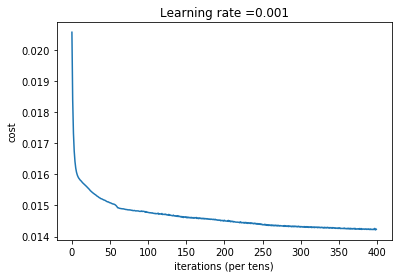

Train Accuracy: 0.0
Test Accuracy: 0.0


In [51]:
parameters = model(X_train, Y_train, X_test, Y_test)